# Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine

# About Dataset
## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### In this example, we train and evaluate Eight different machine learning algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machine, and Multi-Layer Perceptron,KNN,XgBoost, Naive Bayes. We create a bar plot to compare their accuracies and print the confusion matrix and classification report for each model. The bar plot provides a visual comparison of the accuracies of the different models, while the confusion matrix and classification report provide detailed information on the performance of each model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the credit card fraud dataset
df= pd.read_csv(r"E:\Project 4 Python\Credit Card Fraud detection\creditcard.csv")


In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Create and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Create and train the decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Create and train the random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Create and train the support vector machine (SVM) classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set for all models
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Calculate R2 score for all models
lr_r2 = r2_score(y_test, lr_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)
svm_r2 = r2_score(y_test, svm_pred)

# Calculate mean absolute error (MAE) for all models
lr_mae = mean_absolute_error(y_test, lr_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)

# Calculate mean squared error (MSE) for all models
lr_mse = mean_squared_error(y_test, lr_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
svm_mse = mean_squared_error(y_test, svm_pred)

# Print the results
print("Logistic Regression - R2 score: ", lr_r2)
print("Decision Tree - R2 score: ", dt_r2)
print("Random Forest - R2 score: ", rf_r2)
print("Support Vector Machine (SVM) - R2 score: ", svm_r2)

print("Logistic Regression - Mean Absolute Error (MAE): ", lr_mae)
print("Decision Tree - Mean Absolute Error (MAE): ", dt_mae)
print("Random Forest - Mean Absolute Error (MAE): ", rf_mae)
print("Support Vector Machine (SVM) - Mean Absolute Error (MAE): ", svm_mae)

print("Logistic Regression - Mean Squared Error (MSE): ", lr_mse)
print("Decision Tree - Mean Squared Error (MSE): ", dt_mse)
print("Random Forest - Mean Squared Error (MSE): ", rf_mse)
print("Support Vector Machine (SVM) - Mean Squared Error (MSE):",svm_mse);


C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - R2 score:  0.4918382154695259
Decision Tree - R2 score:  0.5212968696452055
Random Forest - R2 score:  0.7643307665945627
Support Vector Machine (SVM) - R2 score:  -0.0015942419731085344
Logistic Regression - Mean Absolute Error (MAE):  0.0008075559144692953
Decision Tree - Mean Absolute Error (MAE):  0.0007607410788478869
Random Forest - Mean Absolute Error (MAE):  0.0003745186849712674
Support Vector Machine (SVM) - Mean Absolute Error (MAE):  0.0015917044111278865
Logistic Regression - Mean Squared Error (MSE):  0.0008075559144692953
Decision Tree - Mean Squared Error (MSE):  0.0007607410788478869
Random Forest - Mean Squared Error (MSE):  0.0003745186849712674
Support Vector Machine (SVM) - Mean Squared Error (MSE): 0.0015917044111278865


In [76]:
# Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred) * 100
print('Logistic Regression Accuracy:',lr_acc)

Logistic Regression Accuracy: 99.90285921608559


C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, lr_pred)* 100
recall_data=recall_score(y_test, lr_pred)* 100
f1_score_data=f1_score(y_test, lr_pred)* 100

In [78]:
precision_data

69.06474820143885

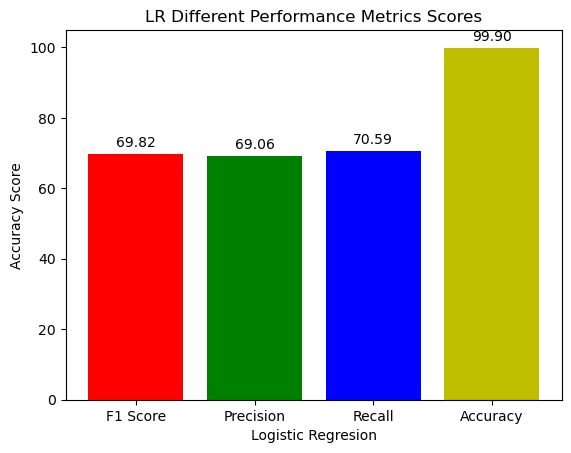

In [79]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, lr_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Logistic Regresion')
ax.set_ylabel('Accuracy Score')
ax.set_title('LR Different Performance Metrics Scores')

# Show the plot
plt.show()


In [80]:
# Train and evaluate Decision Tree Classifier model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)* 100

print('Decision Tree Classifier accuracy:', dtc_acc)

Decision Tree Classifier accuracy: 99.91807403766254


In [81]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, dtc_pred)* 100
recall_data=recall_score(y_test, dtc_pred)* 100
f1_score_data=f1_score(y_test, dtc_pred)* 100

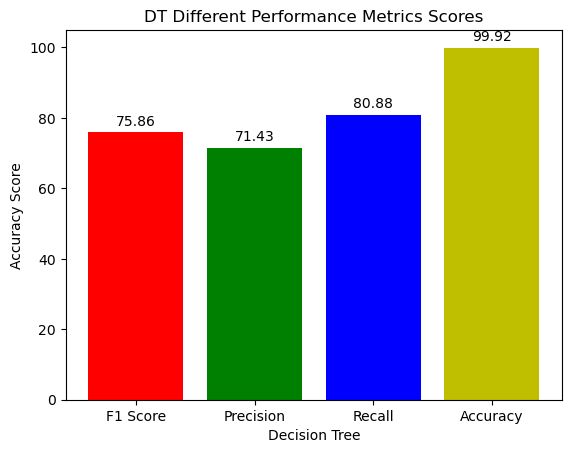

In [82]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, dtc_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Decision Tree')
ax.set_ylabel('Accuracy Score')
ax.set_title('DT Different Performance Metrics Scores')

# Show the plot
plt.show()


In [83]:
# Train and evaluate Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)* 100
print('Random Forest Classifier accuracy:', rfc_acc)

Random Forest Classifier accuracy: 99.9602073897218


In [84]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, rfc_pred)* 100
recall_data=recall_score(y_test, rfc_pred)* 100
f1_score_data=f1_score(y_test, rfc_pred)* 100

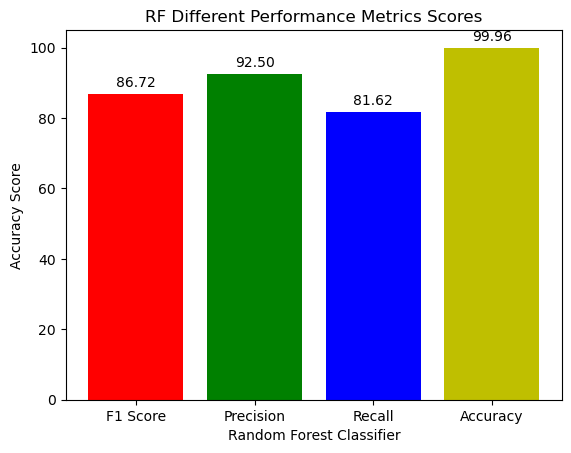

In [85]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, rfc_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Random Forest Classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('RF Different Performance Metrics Scores')

# Show the plot
plt.show()


In [86]:
# Train and evaluate Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)* 100
print('Support Vector Machine accuracy:', svm_acc)

Support Vector Machine accuracy: 99.84082955888721


In [87]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, svm_pred)* 100
recall_data=recall_score(y_test, svm_pred)* 100
f1_score_data=f1_score(y_test, svm_pred)* 100

C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


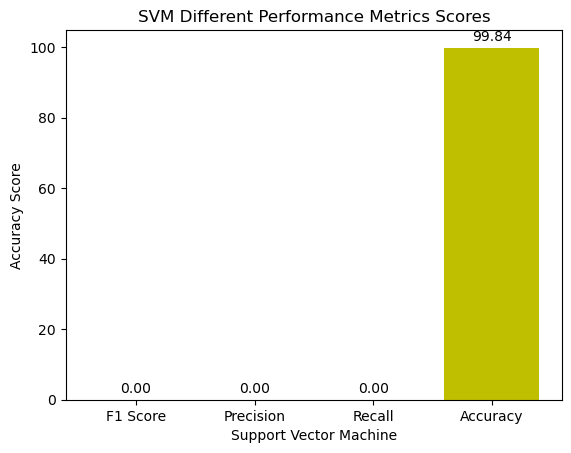

In [88]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, svm_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Support Vector Machine')
ax.set_ylabel('Accuracy Score')
ax.set_title('SVM Different Performance Metrics Scores')

# Show the plot
plt.show()


In [89]:
# Train and evaluate Multi-Layer Perceptron model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)* 100
print('Multi-Layer Perceptron accuracy:', mlp_acc)

Multi-Layer Perceptron accuracy: 99.84317030066828


In [90]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, mlp_pred)* 100
recall_data=recall_score(y_test, mlp_pred)* 100
f1_score_data=f1_score(y_test, mlp_pred)* 100

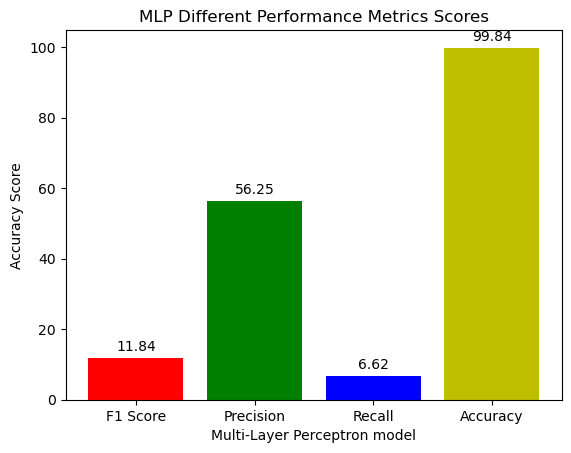

In [91]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, mlp_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Multi-Layer Perceptron model')
ax.set_ylabel('Accuracy Score')
ax.set_title('MLP Different Performance Metrics Scores')

# Show the plot
plt.show()


In [92]:
# Train and evaluate KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)* 100
print('KNN Perceptron accuracy:', knn_acc)

C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Perceptron accuracy: 99.84785178423043


In [93]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, knn_pred)* 100
recall_data=recall_score(y_test, knn_pred)* 100
f1_score_data=f1_score(y_test, knn_pred)* 100

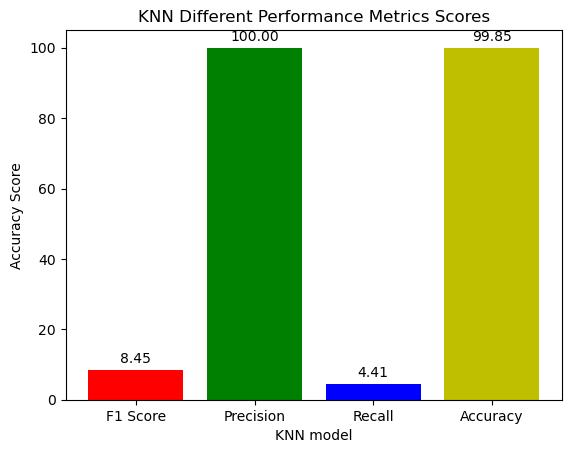

In [94]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, knn_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('KNN model')
ax.set_ylabel('Accuracy Score')
ax.set_title('KNN Different Performance Metrics Scores')

# Show the plot
plt.show()


In [95]:
# Train and evaluate XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)* 100
print('XGB Perceptron accuracy:', xgb_acc)


XGB Perceptron accuracy: 99.96722961506501


In [96]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, xgb_pred)* 100
recall_data=recall_score(y_test, xgb_pred)* 100
f1_score_data=f1_score(y_test, xgb_pred)* 100

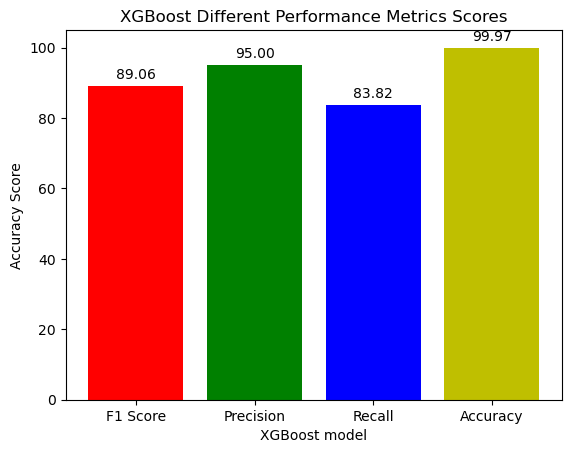

In [97]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, xgb_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('XGBoost model')
ax.set_ylabel('Accuracy Score')
ax.set_title('XGBoost Different Performance Metrics Scores')

# Show the plot
plt.show()


In [98]:
# Train the Naive Bayes classifier
NBC = GaussianNB()
NBC.fit(X_train, y_train)

# Make predictions on the test set
NBC_pred = NBC.predict(X_test)

# Calculate the accuracy of the model
NBC_acc = accuracy_score(y_test, NBC_pred)* 100
print("Naive Bayes classifier Accuracy:", NBC_acc)

Naive Bayes classifier Accuracy: 99.30479969102208


In [99]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_data=precision_score(y_test, NBC_pred)* 100
recall_data=recall_score(y_test, NBC_pred)* 100
f1_score_data=f1_score(y_test, NBC_pred)* 100

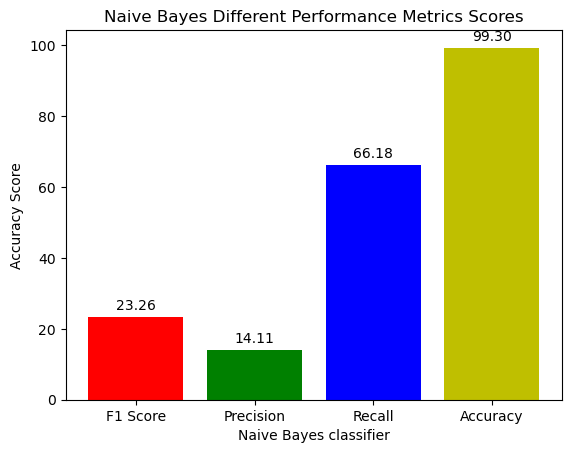

In [100]:
# Define the data for the bar diagram
models = ['F1 Score', 'Precision', 'Recall', 'Accuracy']
accuracies = [f1_score_data, precision_data, recall_data, NBC_acc]
colors = ['r', 'g', 'b', 'y']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Naive Bayes classifier')
ax.set_ylabel('Accuracy Score')
ax.set_title('Naive Bayes Different Performance Metrics Scores')

# Show the plot
plt.show()


This code calculates the confusion matrix using the confusion_matrix() function from sklearn.metrics library. It then visualizes the confusion matrix as a heatmap using the heatmap() function from seaborn library. The heatmap displays the frequency of each predicted class in relation to the true class, with darker colors indicating higher frequencies. The x-axis shows the predicted labels and the y-axis shows the true labels. The annot=True argument adds the counts to the heatmap, and the cmap argument sets the color scheme to 'Blues'. The xlabel() and ylabel() functions set the labels for the x and y axes, respectively, and the title() function sets the title of the plot. Finally, the show() function displays the plot.

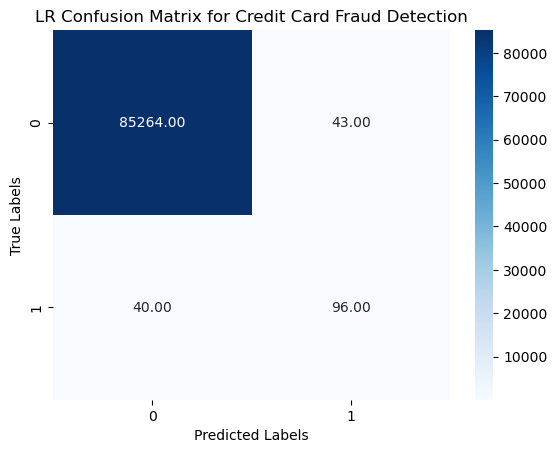

In [130]:
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True,fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LR Confusion Matrix for Credit Card Fraud Detection')
plt.show()

This code calculates the classification report using the classification_report() function from sklearn.metrics library. The output_dict=True argument returns the report as a dictionary. It then converts the dictionary to a dataframe using the pd.DataFrame() function from pandas library, and transposes it using the T attribute to make it easier to visualize. The iloc function is used to exclude the last row of the dataframe which contains the overall metrics. The dataframe is then visualized as a heatmap using the heatmap() function from seaborn library. The heatmap displays the precision, recall and F1-score for each class. The cmap argument sets the color scheme to 'Blues', and the annot=True argument adds the scores to the heatmap. The title() function sets the title of the plot, and the show() function displays the plot.

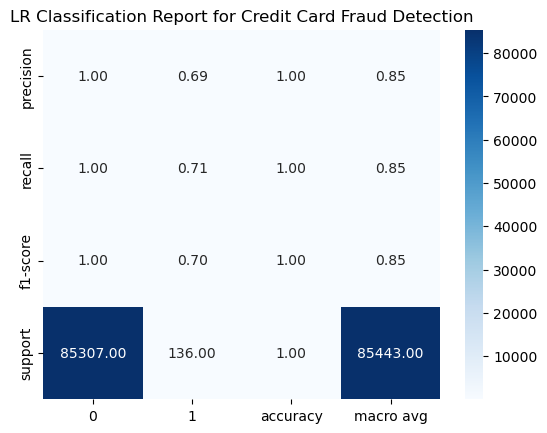

In [129]:
report = classification_report(y_test, lr_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T, cmap='Blues', fmt='.2f',annot=True)
plt.title('LR Classification Report for Credit Card Fraud Detection')
plt.show()

Precision, recall, and F1-score are metrics used to evaluate the performance of a classification model.

Precision: Precision is the ratio of true positive (TP) predictions to the total number of positive predictions (TP + false positives (FP)). It measures the model's ability to correctly identify positive cases out of all the cases it predicted as positive. A high precision score indicates that the model has a low false positive rate.

Recall: Recall is the ratio of true positive (TP) predictions to the total number of actual positive cases (TP + false negatives (FN)). It measures the model's ability to correctly identify positive cases out of all the actual positive cases. A high recall score indicates that the model has a low false negative rate.

F1-score: The F1-score is a weighted harmonic mean of precision and recall. It ranges from 0 to 1, with 1 being the best possible score. The F1-score provides a balance between precision and recall, giving an overall measure of a model's performance.

In summary, precision is the ability of the model to accurately predict positive cases, recall is the ability of the model to identify all actual positive cases, and the F1-score provides an overall measure of the model's accuracy. These metrics are often used together to evaluate the performance of a classification model.

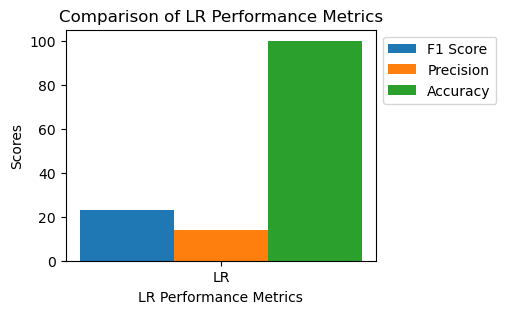

In [103]:
import matplotlib.pyplot as plt

# Define the data

# Define the labels for the x-axis
model_labels = ['LR']

# Create the figure and set the size
fig, ax = plt.subplots(figsize=(4, 3))

# Define the positions of the bars on the x-axis
x_pos = list(range(len(model_labels)))

# Create the bars for f1 score, precision, and accuracy
f1_bars = ax.bar(x_pos, f1_score_data, width=0.25, label='F1 Score')
precision_bars = ax.bar([x + 0.25 for x in x_pos], precision_data, width=0.25, label='Precision')
accuracy_bars = ax.bar([x + 0.5 for x in x_pos], lr_acc, width=0.25, label='Accuracy')




# Add labels and title to the plot
ax.set_xlabel('LR Performance Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of LR Performance Metrics')

# Add tick labels to the x-axis
ax.set_xticks([x + 0.25 for x in x_pos])
ax.set_xticklabels(model_labels)

# Add a legend
#ax.legend()
ax.legend(bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


In [104]:
# Print the confusion matrix and classification report for each model
print('Logistic Regression confusion matrix:\n', confusion_matrix(y_test, lr_pred))
print('Logistic Regression classification report:\n', classification_report(y_test, lr_pred))



Logistic Regression confusion matrix:
 [[85264    43]
 [   40    96]]
Logistic Regression classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.71      0.70       136

    accuracy                           1.00     85443
   macro avg       0.85      0.85      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [105]:
print('Decision Tree Classifier confusion matrix:\n', confusion_matrix(y_test, dtc_pred))
print('Decision Tree Classifier classification report:\n', classification_report(y_test, dtc_pred))


Decision Tree Classifier confusion matrix:
 [[85263    44]
 [   26   110]]
Decision Tree Classifier classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.81      0.76       136

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



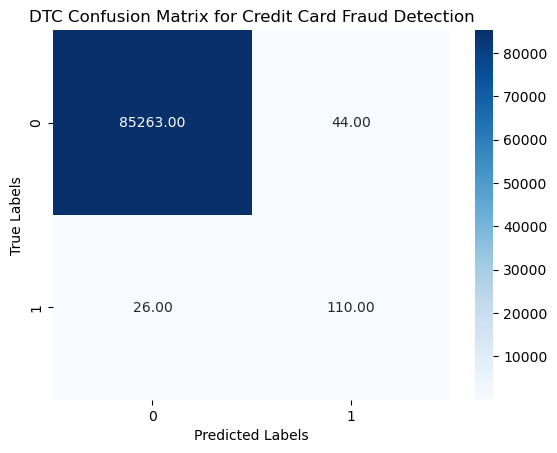

In [128]:
cm = confusion_matrix(y_test, dtc_pred)
sns.heatmap(cm, annot=True, cmap='Blues' ,fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DTC Confusion Matrix for Credit Card Fraud Detection')
plt.show()

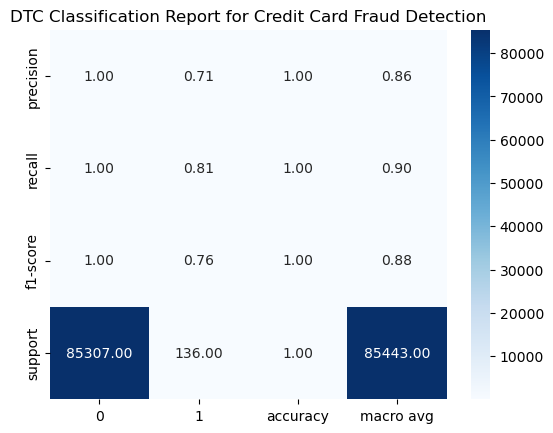

In [125]:
report = classification_report(y_test, dtc_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T, fmt='.2f', cmap='Blues', annot=True)
plt.title('DTC Classification Report for Credit Card Fraud Detection')
plt.show()

In [108]:
print('Random Forest Classifier confusion matrix:\n', confusion_matrix(y_test, rfc_pred))
print('Random Forest Classifier classification report:\n', classification_report(y_test, rfc_pred))

Random Forest Classifier confusion matrix:
 [[85298     9]
 [   25   111]]
Random Forest Classifier classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



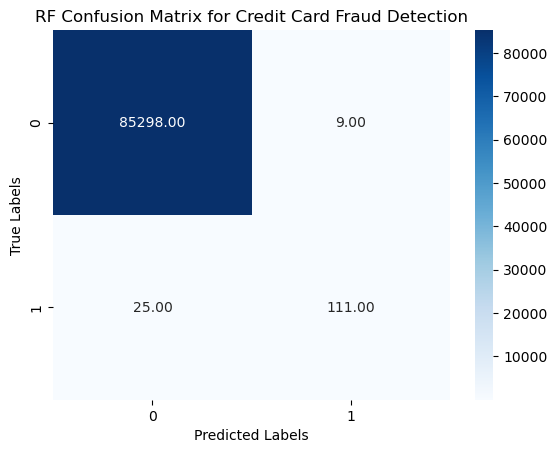

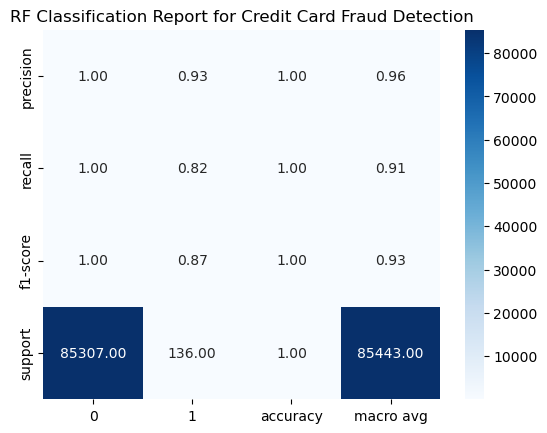

In [131]:
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True, fmt='.2f',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('RF Confusion Matrix for Credit Card Fraud Detection')
plt.show()

report = classification_report(y_test, rfc_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T,fmt='.2f', cmap='Blues', annot=True)
plt.title('RF Classification Report for Credit Card Fraud Detection')
plt.show()

In [110]:
print('Support Vector Machine confusion matrix:\n', confusion_matrix(y_test, svm_pred))
print('Support Vector Machine classification report:\n', classification_report(y_test, svm_pred))

Support Vector Machine confusion matrix:
 [[85307     0]
 [  136     0]]
Support Vector Machine classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


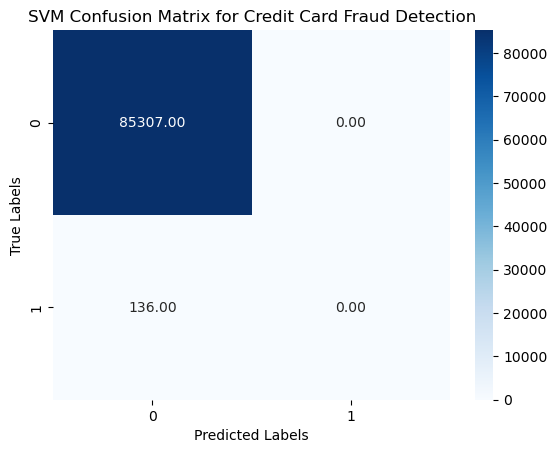

C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


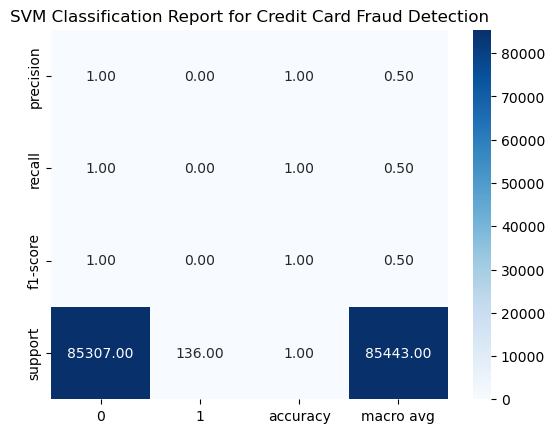

In [132]:
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True,fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Confusion Matrix for Credit Card Fraud Detection')
plt.show()

report = classification_report(y_test, svm_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T, cmap='Blues',fmt='.2f', annot=True)
plt.title('SVM Classification Report for Credit Card Fraud Detection')
plt.show()

In [113]:
print('Multi-Layer Perceptron confusion matrix:\n', confusion_matrix(y_test, mlp_pred))
print('Multi-Layer Perceptron classification report:\n', classification_report(y_test, mlp_pred))

Multi-Layer Perceptron confusion matrix:
 [[85300     7]
 [  127     9]]
Multi-Layer Perceptron classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.56      0.07      0.12       136

    accuracy                           1.00     85443
   macro avg       0.78      0.53      0.56     85443
weighted avg       1.00      1.00      1.00     85443



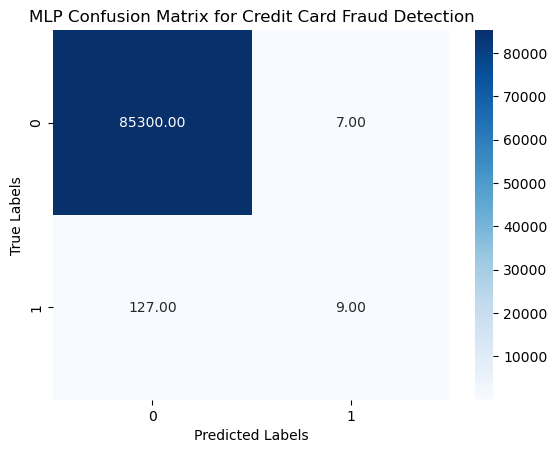

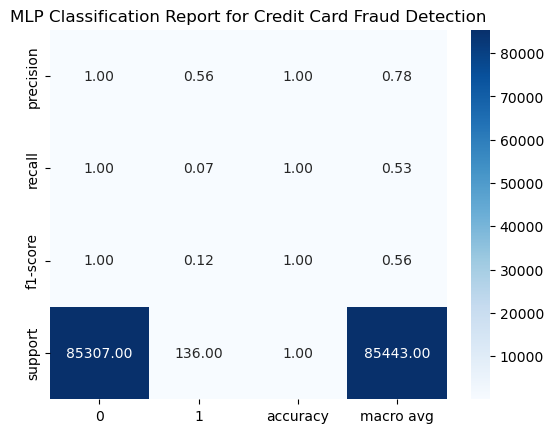

In [133]:
cm = confusion_matrix(y_test, mlp_pred)
sns.heatmap(cm, annot=True, fmt='.2f',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MLP Confusion Matrix for Credit Card Fraud Detection')
plt.show()

report = classification_report(y_test, mlp_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T, cmap='Blues', fmt='.2f',annot=True)
plt.title('MLP Classification Report for Credit Card Fraud Detection')
plt.show()

In [115]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test, mlp_pred)

0.5625

In [116]:
recall_score(y_test, svm_pred)

0.0

In [117]:
print('KNN Perceptron confusion matrix:\n', confusion_matrix(y_test, knn_pred))
print('KNN Perceptron classification report:\n', classification_report(y_test, knn_pred))

KNN Perceptron confusion matrix:
 [[85307     0]
 [  130     6]]
KNN Perceptron classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       1.00      0.04      0.08       136

    accuracy                           1.00     85443
   macro avg       1.00      0.52      0.54     85443
weighted avg       1.00      1.00      1.00     85443



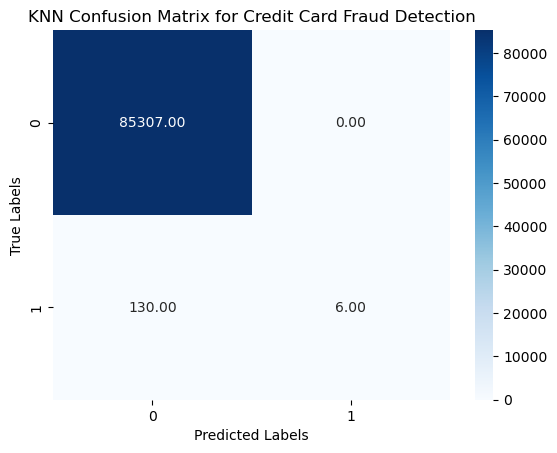

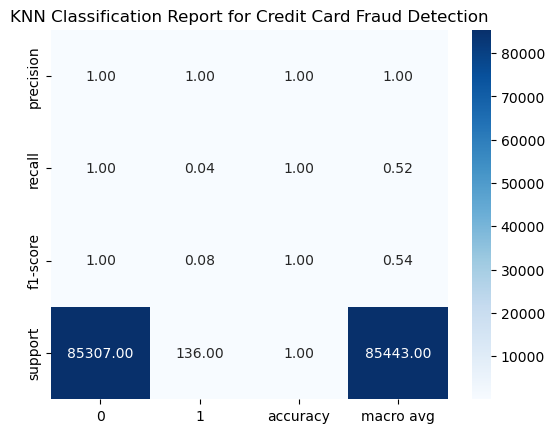

In [134]:
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, fmt='.2f',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix for Credit Card Fraud Detection')
plt.show()

report = classification_report(y_test, knn_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T, cmap='Blues', fmt='.2f',annot=True)
plt.title('KNN Classification Report for Credit Card Fraud Detection')
plt.show()

In [119]:
print('XgBoost Perceptron confusion matrix:\n', confusion_matrix(y_test, xgb_pred))
print('XgBoost Perceptron classification report:\n', classification_report(y_test, xgb_pred))

XgBoost Perceptron confusion matrix:
 [[85301     6]
 [   22   114]]
XgBoost Perceptron classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.84      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443



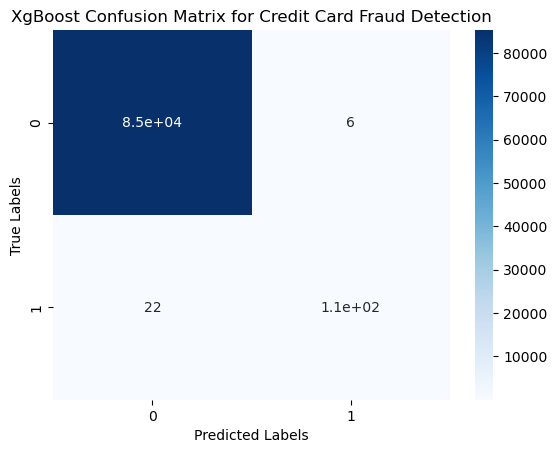

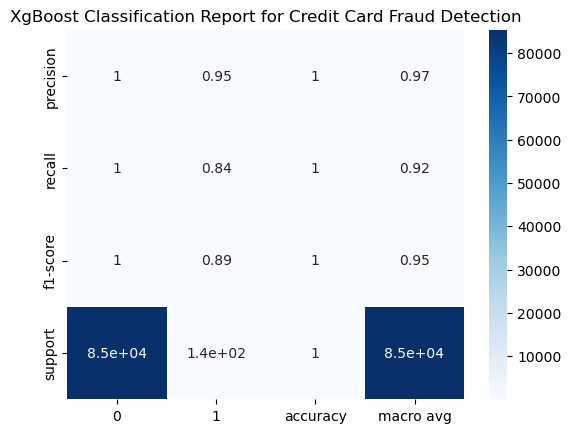

In [120]:
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XgBoost Confusion Matrix for Credit Card Fraud Detection')
plt.show()

report = classification_report(y_test, xgb_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T,fmt='.2f', cmap='Blues', annot=True)
plt.title('XgBoost Classification Report for Credit Card Fraud Detection')
plt.show()

In [121]:
print('NBC Perceptron confusion matrix:\n', confusion_matrix(y_test, NBC_pred))
print('NBC Perceptron classification report:\n', classification_report(y_test, NBC_pred))

NBC Perceptron confusion matrix:
 [[84759   548]
 [   46    90]]
NBC Perceptron classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.14      0.66      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.83      0.61     85443
weighted avg       1.00      0.99      1.00     85443



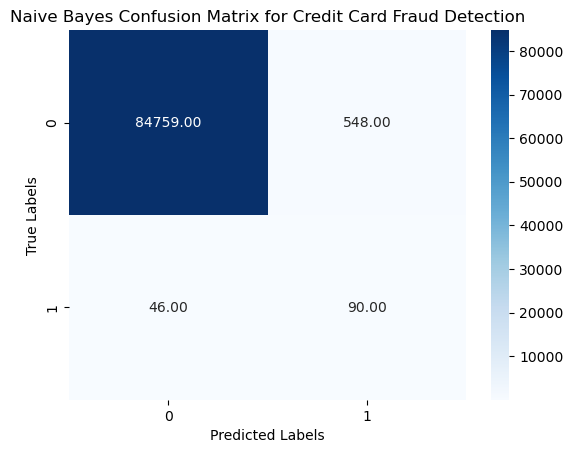

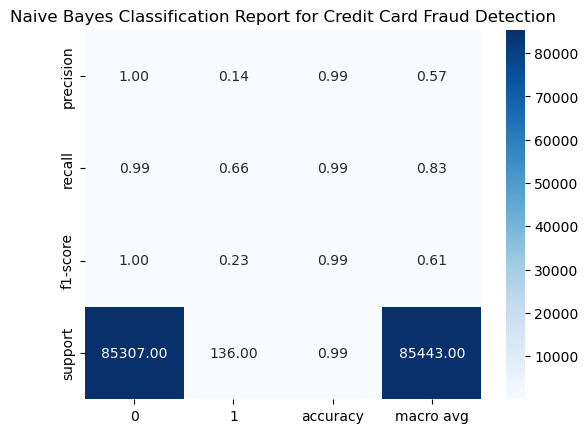

In [138]:
cm = confusion_matrix(y_test, NBC_pred)
sns.heatmap(cm, annot=True, fmt='.2f',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix for Credit Card Fraud Detection')
plt.show()

report = classification_report(y_test, NBC_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].T,fmt='.2f', cmap='Blues', annot=True)
plt.title('Naive Bayes Classification Report for Credit Card Fraud Detection')
plt.show()

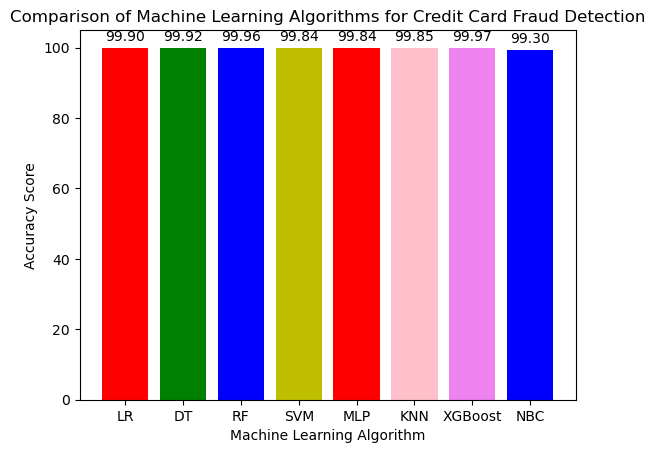

In [136]:
# Define the data for the bar diagram
models = ['LR', 'DT', 'RF', 'SVM', 'MLP','KNN', 'XGBoost','NBC']
accuracies = [lr_acc, dtc_acc, rfc_acc, svm_acc, mlp_acc,knn_acc, xgb_acc,NBC_acc]
colors = ['r', 'g', 'b', 'y','r','pink','violet','b']
# Create the bar diagram
fig, ax = plt.subplots()
rects = ax.bar(models, accuracies,color=colors)

# Add the values to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), 
                textcoords="offset points", ha='center', va='bottom')

# Add labels and a title
ax.set_xlabel('Machine Learning Algorithm')
ax.set_ylabel('Accuracy Score')
ax.set_title('Comparison of Machine Learning Algorithms for Credit Card Fraud Detection')

# Show the plot
plt.show()


In this example, we train and evaluate five different machine learning algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machine, and Multi-Layer Perceptron. We create a bar plot to compare their accuracies and print the confusion matrix and classification report for each model. The bar plot provides a visual comparison of the accuracies of the different models, while the confusion matrix and classification report provide detailed information on the performance of each model.